In [66]:
from networkx.generators.random_graphs import connected_watts_strogatz_graph
from collections import defaultdict, Counter
from random import random, sample
import matplotlib.pyplot as plt
import multiprocessing as mp
from itertools import cycle, chain, product
import matplotlib as mpl
import networkx as nx
import numpy as np
import time

In [76]:
def take(li, k):
    return [i[k] for i in li]

def simulate(n, k, p, p_inf, p_ext, T):
    results = []
    g = connected_watts_strogatz_graph(n, k, p).to_directed()
    infections = defaultdict(lambda: None)
    infections[0] = 0
    num_infected = 1
    for t in range(1, T):
        for v1 in g.nodes:
            if infections[v1] is None:
                if random() < p_ext:
                    infections[v1] = t
                    num_infected += 1
        for (v1, v2) in g.edges:
            if infections[v1] is not None and infections[v1] < t: # infected in a previous round
                if infections[v2] is None: # not yet infected
                    if random() < p_inf:
                        infections[v2] = t
                        num_infected += 1
        results.append((t, num_infected))
    return results

In [98]:
# Watts-Strogatz graph params
ns = [10*1000, 50*1000, 100*1000, 500*1000, 1000*1000]
k = 10
p = 0.1
# infection model
p_inf = 0.05 # daily infection probability, for each neighbor
p_exts = [0, 0.001] # daily probability of external infection, for each node
# simulation length
T = 100 # days

results = {}
for (n, p_ext) in product(ns, p_exts):
    print('Running simulations for (n=%s, p_ext=%s)' % (n, p_ext))
    start_time = time.time()
    results[(n, p_ext)] = simulate(n, k, p, p_inf, p_ext, T)
    elapsed_time = time.time() - start_time
    print('Done! Elapsed %s' % time.strftime("%M:%S", time.gmtime(elapsed_time)))

Running simulations for (n=10000, p_ext=0)
Done! Elapsed 00:01
Running simulations for (n=10000, p_ext=0.001)
Done! Elapsed 00:02
Running simulations for (n=50000, p_ext=0)
Done! Elapsed 00:09
Running simulations for (n=50000, p_ext=0.001)
Done! Elapsed 00:10
Running simulations for (n=100000, p_ext=0)
Done! Elapsed 00:19
Running simulations for (n=100000, p_ext=0.001)
Done! Elapsed 00:21
Running simulations for (n=500000, p_ext=0)
Done! Elapsed 01:41
Running simulations for (n=500000, p_ext=0.001)
Done! Elapsed 01:53
Running simulations for (n=1000000, p_ext=0)
Done! Elapsed 03:23
Running simulations for (n=1000000, p_ext=0.001)
Done! Elapsed 03:52


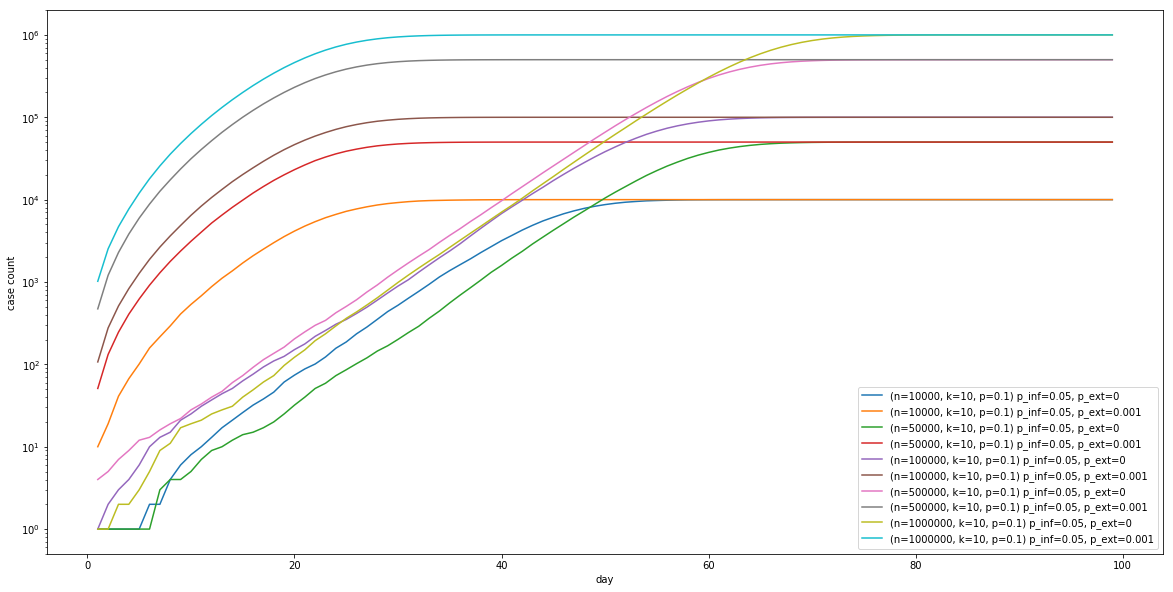

In [100]:
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.xlabel('day')
plt.ylabel('case count')
legends = []
for (n, p_ext) in product(ns, p_exts):
    plt.plot(take(results[(n, p_ext)], 0), take(results[(n, p_ext)], 1))
    legends.append('(n=%s, k=%s, p=%s) p_inf=%s, p_ext=%s' % (n, k, p, p_inf, p_ext))
plt.legend(legends)

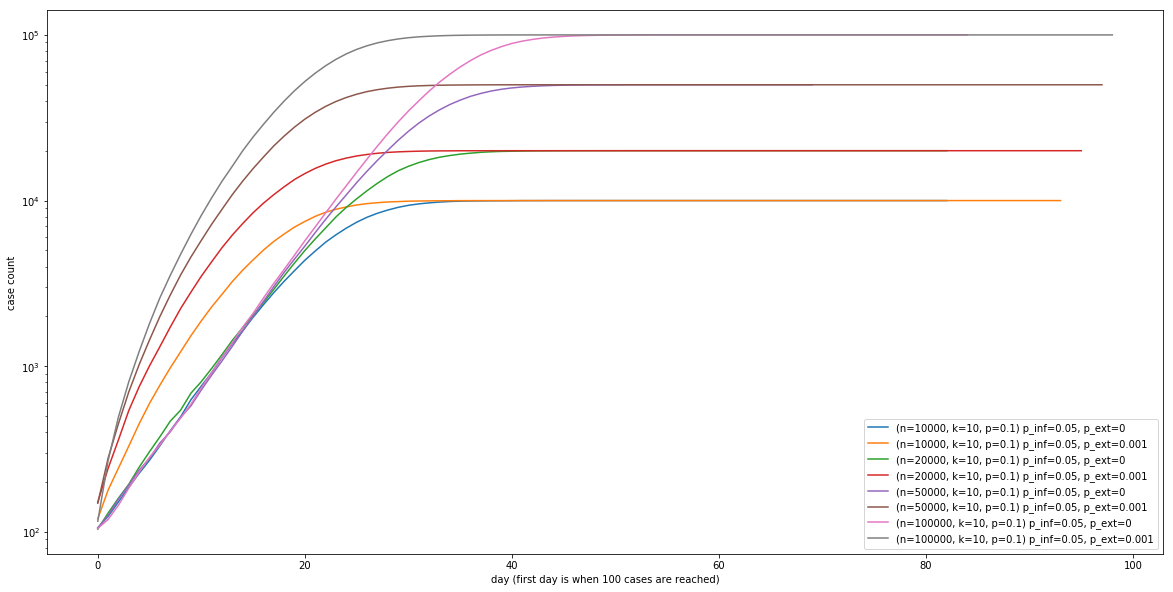

In [92]:
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.xlabel('day (first day is when 100 cases are reached)')
plt.ylabel('case count')
legends = []
for (n, p_ext) in product(ns, p_exts):
    plt.plot(list(filter(lambda x: x > 100, take(results[(n, p_ext)], 1))))
    legends.append('(n=%s, k=%s, p=%s) p_inf=%s, p_ext=%s' % (n, k, p, p_inf, p_ext))
plt.legend(legends)

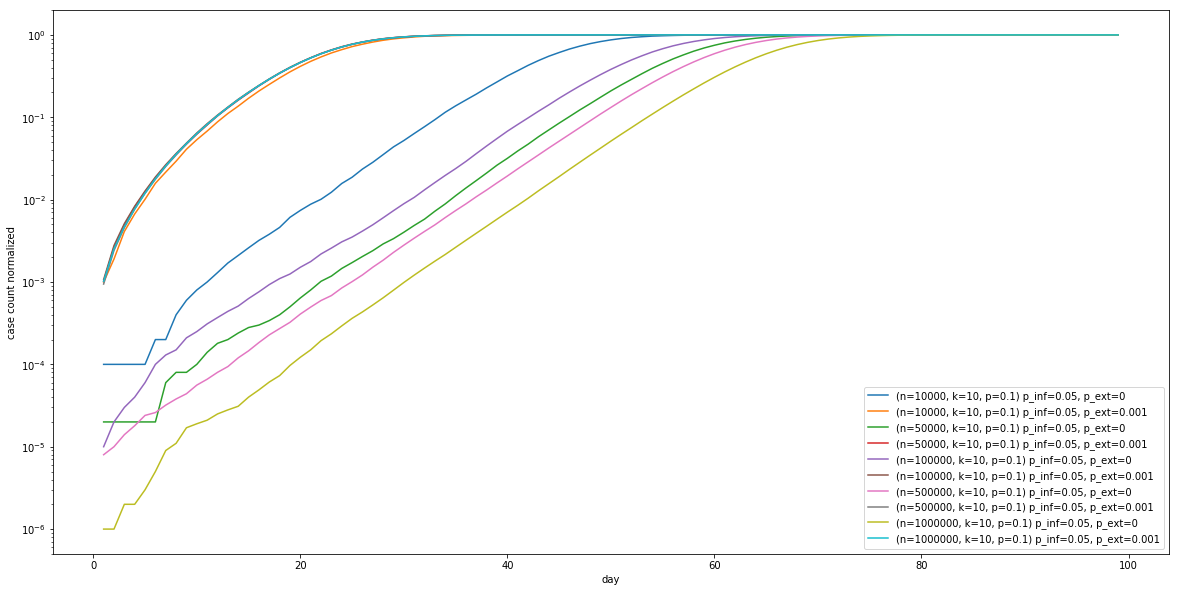

In [101]:
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.xlabel('day')
plt.ylabel('case count normalized')
legends = []
for (n, p_ext) in product(ns, p_exts):
    plt.plot(take(results[(n, p_ext)], 0), [x/n for x in take(results[(n, p_ext)], 1)])
    legends.append('(n=%s, k=%s, p=%s) p_inf=%s, p_ext=%s' % (n, k, p, p_inf, p_ext))
plt.legend(legends)

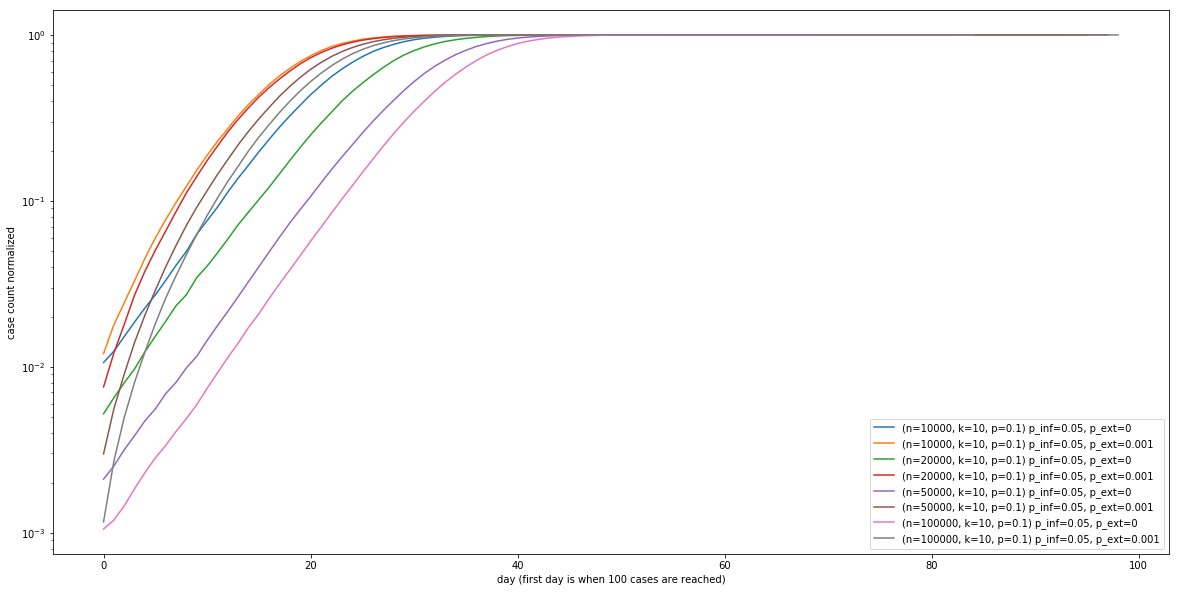

In [95]:
plt.figure(figsize=(20, 10))
plt.yscale('log')
plt.xlabel('day (first day is when 100 cases are reached)')
plt.ylabel('case count normalized')
legends = []
for (n, p_ext) in product(ns, p_exts):
    plt.plot([x/n for x in filter(lambda x: x > 100, take(results[(n, p_ext)], 1))])
    legends.append('(n=%s, k=%s, p=%s) p_inf=%s, p_ext=%s' % (n, k, p, p_inf, p_ext))
plt.legend(legends)